In [2]:
pip install matplotlib

  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.0/l

In [4]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 5.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.0/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/opt/homebrew/Cellar/jupyterlab/4.4.0/libexec/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Cellar/jupyterlab/4.4.0/libexec/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Cellar/jupyterlab/4.4.0/libexec/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Cellar/jupyterlab/4.4.0/libexec/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood 

RMSE: 0.29290491274979785
MAE: 0.22895323708497448


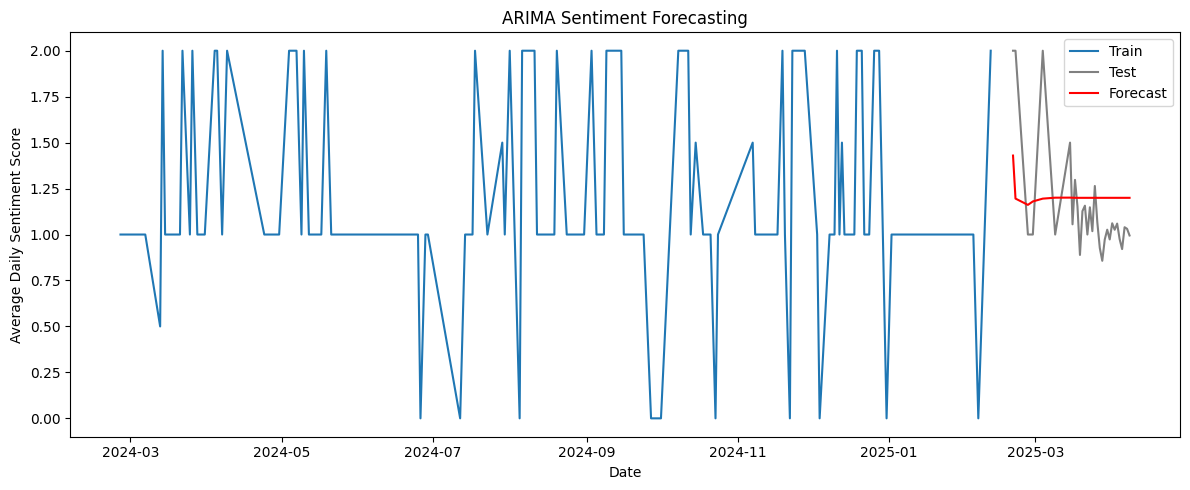

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load the encoded dataset
file_path = "/Users/jinenmodi/ImpData/Crypto Sentiment Prediction/crypto_sentiment_project/data/crypto_news_with_sentiment_encoded.xlsx"
df = pd.read_excel(file_path)

# Convert 'published_date' to datetime
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df = df.dropna(subset=['published_date'])

# Sort by date
df = df.sort_values('published_date')

# Group by day and calculate mean sentiment score
daily_sentiment = df.groupby(df['published_date'].dt.date)['sentiment_encoded'].mean()

# Convert index to datetime for ARIMA compatibility
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

# Train-test split
split_index = int(len(daily_sentiment) * 0.8)
train = daily_sentiment[:split_index]
test = daily_sentiment[split_index:]

# Fit ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # You can tune this order
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

# Evaluation metrics
rmse = sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print("RMSE:", rmse)
print("MAE:", mae)

# Plot actual vs forecasted sentiment
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="gray")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.legend()
plt.title("ARIMA Sentiment Forecasting")
plt.xlabel("Date")
plt.ylabel("Average Daily Sentiment Score")
plt.tight_layout()
plt.show()

/opt/homebrew/Cellar/jupyterlab/4.4.0/libexec/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Cellar/jupyterlab/4.4.0/libexec/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Cellar/jupyterlab/4.4.0/libexec/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Cellar/jupyterlab/4.4.0/libexec/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood 

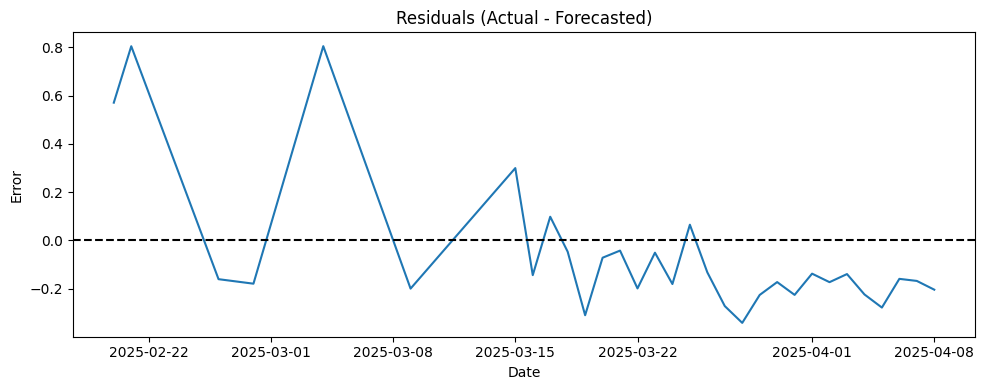

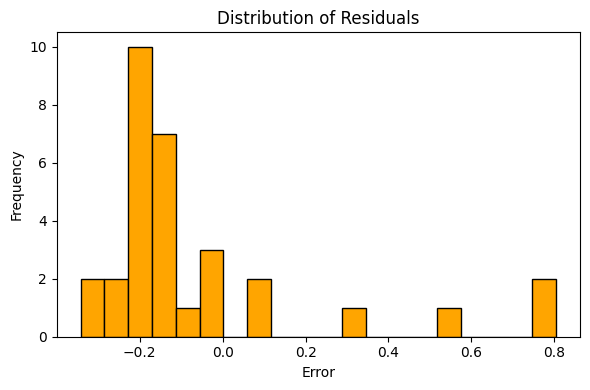

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reload data
file_path = "/Users/jinenmodi/ImpData/Crypto Sentiment Prediction/crypto_sentiment_project/data/crypto_news_with_sentiment_encoded.xlsx"
df = pd.read_excel(file_path)

# Preprocess date
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df = df.dropna(subset=['published_date'])
df = df.sort_values('published_date')

# Group by day, get average sentiment score
daily_sentiment = df.groupby(df['published_date'].dt.date)['sentiment_encoded'].mean()
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

# Train-test split
split_index = int(len(daily_sentiment) * 0.8)
train = daily_sentiment[:split_index]
test = daily_sentiment[split_index:]

# ARIMA model
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

# ✅ Residuals (Error)
residuals = test - forecast

# 📊 Residual Plot
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals (Actual - Forecasted)")
plt.xlabel("Date")
plt.ylabel("Error")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# 📊 Histogram of Residuals
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

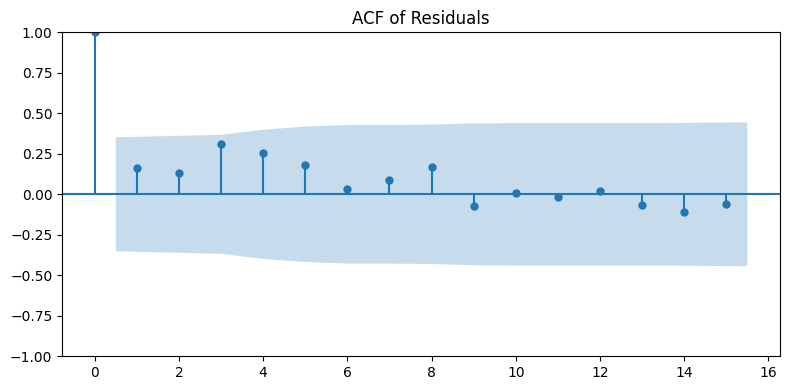

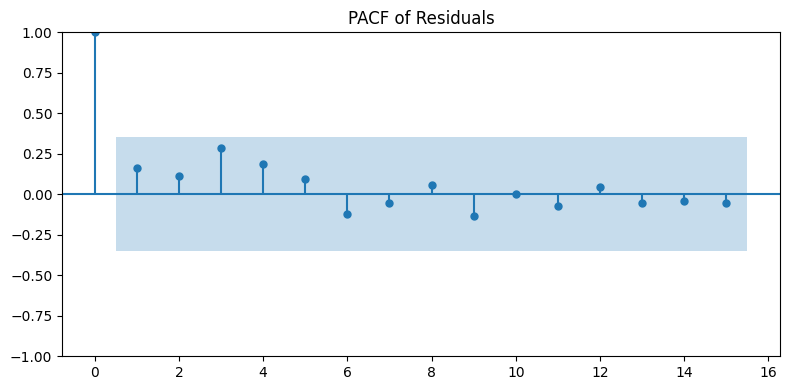

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

max_lags = len(residuals) // 2  # Must be < 50% of sample size

# ACF Plot
plt.figure(figsize=(8, 4))
plot_acf(residuals, lags=max_lags, ax=plt.gca())
plt.title("ACF of Residuals")
plt.tight_layout()
plt.show()

# PACF Plot
plt.figure(figsize=(8, 4))
plot_pacf(residuals, lags=max_lags, method='ywm', ax=plt.gca())
plt.title("PACF of Residuals")
plt.tight_layout()
plt.show()